In [1]:
import pandas as pd

# CNN project with animal draws : models construction 

### Set up notebook

Set up and activate gpu

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Import required libraries

In [603]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
import itertools

#import all the pieces of the neural network
from tensorflow.keras.models import Sequential, Model, load_model#the model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate #fully connected layers
from tensorflow.keras.layers import Convolution2D, MaxPooling2D #the convnet
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import pickle
from tensorflow.keras.layers import *

### Confusion matrix function

In [3]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(14,14))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=10)

    plt.tight_layout()
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

### Load all animals data

categories 1 to 10

In [4]:
np_bear_npy = np.load('./../../Assets/bear.npy', allow_pickle=True)
np_bee_npy = np.load('./../../Assets/bee.npy', allow_pickle=True)
np_bird_npy = np.load('./../../Assets/bird.npy', allow_pickle=True)
np_butterfly_npy = np.load('./../../Assets/butterfly.npy', allow_pickle=True)
np_camel_npy = np.load('./../../Assets/camel.npy', allow_pickle=True)
np_cat_npy = np.load('./../../Assets/cat.npy', allow_pickle=True)
np_cow_npy = np.load('./../../Assets/cow.npy', allow_pickle=True)
np_crab_npy = np.load('./../../Assets/crab.npy', allow_pickle=True)
np_crocodile_npy = np.load('./../../Assets/crocodile.npy', allow_pickle=True)
np_dog_npy = np.load('./../../Assets/dog.npy', allow_pickle=True)

categories 11 to 20

In [5]:
np_dolphin_npy = np.load('./../../Assets/dolphin.npy', allow_pickle=True)
np_elephant_npy = np.load('./../../Assets/elephant.npy', allow_pickle=True)
np_frog_npy = np.load('./../../Assets/frog.npy', allow_pickle=True)
np_giraffe_npy = np.load('./../../Assets/giraffe.npy', allow_pickle=True)
np_horse_npy = np.load('./../../Assets/horse.npy', allow_pickle=True)
np_kangaroo_npy = np.load('./../../Assets/kangaroo.npy', allow_pickle=True)
np_lion_npy = np.load('./../../Assets/lion.npy', allow_pickle=True)
np_lobster_npy = np.load('./../../Assets/lobster.npy', allow_pickle=True)
np_monkey_npy = np.load('./../../Assets/monkey.npy', allow_pickle=True)
np_mosquito_npy = np.load('./../../Assets/mosquito.npy', allow_pickle=True)

categories 21 to 30

In [6]:
np_mouse_npy = np.load('./../../Assets/mouse.npy', allow_pickle=True)
np_octopus_npy = np.load('./../../Assets/octopus.npy', allow_pickle=True)
np_owl_npy = np.load('./../../Assets/owl.npy', allow_pickle=True)
np_panda_npy = np.load('./../../Assets/panda.npy', allow_pickle=True)
np_parrot_npy = np.load('./../../Assets/parrot.npy', allow_pickle=True)
np_penguin_npy = np.load('./../../Assets/penguin.npy', allow_pickle=True)
np_pig_npy = np.load('./../../Assets/pig.npy', allow_pickle=True)
np_rabbit_npy = np.load('./../../Assets/rabbit.npy', allow_pickle=True)
np_raccoon_npy = np.load('./../../Assets/raccoon.npy', allow_pickle=True)
np_rhinoceros_npy = np.load('./../../Assets/rhinoceros.npy', allow_pickle=True)

categories 31 to 40

In [7]:
np_scorpion_npy = np.load('./../../Assets/scorpion.npy', allow_pickle=True)
np_sea_turtle_npy = np.load('./../../Assets/sea_turtle.npy', allow_pickle=True)
np_sheep_npy = np.load('./../../Assets/sheep.npy', allow_pickle=True)
np_snail_npy = np.load('./../../Assets/snail.npy', allow_pickle=True)
np_snake_npy = np.load('./../../Assets/snake.npy', allow_pickle=True)
np_spider_npy = np.load('./../../Assets/spider.npy', allow_pickle=True)
np_squirrel_npy = np.load('./../../Assets/squirrel.npy', allow_pickle=True)
np_swan_npy = np.load('./../../Assets/swan.npy', allow_pickle=True)
np_tiger_npy = np.load('./../../Assets/tiger.npy', allow_pickle=True)
np_whale_npy = np.load('./../../Assets/whale.npy', allow_pickle=True)

check files shapes

In [8]:
print(np_bear_npy.shape, np_bee_npy.shape, np_bird_npy.shape, np_butterfly_npy.shape, np_camel_npy.shape, 
      np_cat_npy.shape, np_cow_npy.shape, np_crab_npy.shape, np_crocodile_npy.shape, np_dog_npy.shape, 
      np_dolphin_npy.shape, np_elephant_npy.shape, np_frog_npy.shape, np_giraffe_npy.shape, np_horse_npy.shape, 
      np_kangaroo_npy.shape, np_lion_npy.shape, np_lobster_npy.shape, np_monkey_npy.shape, np_mosquito_npy.shape, 
      np_mouse_npy.shape, np_octopus_npy.shape, np_owl_npy.shape, np_panda_npy.shape, np_parrot_npy.shape, 
      np_penguin_npy.shape, np_pig_npy.shape, np_rabbit_npy.shape, np_raccoon_npy.shape, np_rhinoceros_npy.shape, 
      np_scorpion_npy.shape, np_sea_turtle_npy.shape, np_sheep_npy.shape, np_snail_npy.shape, np_snake_npy.shape, 
      np_spider_npy.shape, np_squirrel_npy.shape, np_swan_npy.shape, np_tiger_npy.shape, np_whale_npy.shape)

(20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2) (20000, 2)


In [9]:
#all_animals_np = np.vstack([np_bear_npy, np_bee_npy, np_bird_npy, np_butterfly_npy, np_camel_npy, np_cat_npy, np_cow_npy, np_crab_npy, np_crocodile_npy, np_dog_npy])

In [10]:
#all_animals_np20 = np.vstack([np_bear_npy, np_bee_npy, np_bird_npy, np_butterfly_npy, np_camel_npy, np_cat_npy, np_cow_npy, np_crab_npy, np_crocodile_npy, np_dog_npy, np_dolphin_npy, np_elephant_npy, np_frog_npy, np_giraffe_npy, np_horse_npy, np_kangaroo_npy, np_lion_npy, np_lobster_npy, np_monkey_npy, np_mosquito_npy])

### Train test split

In [11]:
list_files10a = [np_bear_npy, np_bee_npy, np_bird_npy, np_butterfly_npy, np_camel_npy, 
                 np_cat_npy, np_cow_npy, np_crab_npy, np_crocodile_npy, np_dog_npy]

In [12]:
list_files20a = [np_bear_npy, np_bee_npy, np_bird_npy, np_butterfly_npy, np_camel_npy, 
                 np_cat_npy, np_cow_npy, np_crab_npy, np_crocodile_npy, np_dog_npy, 
                 np_dolphin_npy, np_elephant_npy, np_frog_npy, np_giraffe_npy, np_horse_npy, 
                 np_kangaroo_npy, np_lion_npy, np_lobster_npy, np_monkey_npy, np_mosquito_npy]

In [13]:
list_files40a = [np_bear_npy, np_bee_npy, np_bird_npy, np_butterfly_npy, np_camel_npy, 
                 np_cat_npy, np_cow_npy, np_crab_npy, np_crocodile_npy, np_dog_npy, 
                 np_dolphin_npy, np_elephant_npy, np_frog_npy, np_giraffe_npy, np_horse_npy, 
                 np_kangaroo_npy, np_lion_npy, np_lobster_npy, np_monkey_npy, np_mosquito_npy, 
                 np_mouse_npy, np_octopus_npy, np_owl_npy, np_panda_npy, np_parrot_npy, 
                 np_penguin_npy, np_pig_npy, np_rabbit_npy, np_raccoon_npy, np_rhinoceros_npy, 
                 np_scorpion_npy, np_sea_turtle_npy, np_sheep_npy, np_snail_npy, np_snake_npy, 
                 np_spider_npy, np_squirrel_npy, np_swan_npy, np_tiger_npy, np_whale_npy]                 

In [14]:
list_files35a = [np_bee_npy, np_bird_npy, np_butterfly_npy, np_camel_npy, 
                 np_cat_npy, np_cow_npy, np_crocodile_npy, np_dog_npy, 
                 np_dolphin_npy, np_elephant_npy, np_frog_npy, np_giraffe_npy, np_horse_npy, 
                 np_kangaroo_npy, np_lion_npy, np_lobster_npy, np_monkey_npy, np_mosquito_npy, 
                 np_mouse_npy, np_octopus_npy, np_owl_npy, np_panda_npy, 
                 np_penguin_npy, np_pig_npy, np_rabbit_npy, np_rhinoceros_npy, 
                 np_scorpion_npy, np_sea_turtle_npy, np_sheep_npy, np_snail_npy, np_snake_npy, 
                 np_spider_npy, np_squirrel_npy, np_swan_npy, np_tiger_npy]                 

In [15]:
len(list_files35a)

35

In [16]:
def dif_train_test(my_files):
    X_train = np.empty((0,64,64,1), dtype="float32")
    X_test = np.empty((0,64,64,1), dtype="float32")
    y_train = pd.Series([], dtype="float32")
    y_test = pd.Series([], dtype="float32")

    for i in range (0, len(my_files)) : 
        my_df = f"df{i}" 
        my_df  = pd.DataFrame(data = my_files[i][0:, 0:], columns = ['drawing', 'label'])
        drawings = np.stack(my_df['drawing'].to_numpy()).reshape(20000, 64, 64, 1)
        train_drawings, test_drawings, train_labels, test_labels = train_test_split(drawings.astype('float32'), 
                                                                                    my_df['label'].astype('float32'),
                                                                                    test_size=0.2, random_state=42, shuffle=True)
        train_temp_set = np.vstack((X_train, train_drawings)) 
        X_train = train_temp_set
        y_train = y_train.append(train_labels)
        
        test_temp_set = np.vstack((X_test, test_drawings)) 
        X_test = test_temp_set
        y_test = y_test.append(test_labels)

    return X_train, X_test, y_train, y_test

In [17]:
X_train35a, X_test35a, y_train35a, y_test35a = dif_train_test(list_files35a)

In [18]:
X_train35a.shape

(560000, 64, 64, 1)

In [19]:
X_test35a.shape

(140000, 64, 64, 1)

In [20]:
y_train35a.value_counts()

8.0     16000
20.0    16000
26.0    16000
6.0     16000
25.0    16000
21.0    16000
31.0    16000
4.0     16000
23.0    16000
10.0    16000
17.0    16000
12.0    16000
34.0    16000
5.0     16000
35.0    16000
30.0    16000
15.0    16000
19.0    16000
38.0    16000
27.0    16000
29.0    16000
3.0     16000
18.0    16000
16.0    16000
2.0     16000
14.0    16000
13.0    16000
9.0     16000
36.0    16000
1.0     16000
32.0    16000
11.0    16000
22.0    16000
33.0    16000
37.0    16000
dtype: int64

In [21]:
y_train35a.shape

(560000,)

In [22]:
y_train_results = y_train35a.rank(axis=0, method='dense')-1

In [23]:
y_train_results.value_counts()

0.0     16000
31.0    16000
15.0    16000
26.0    16000
6.0     16000
25.0    16000
21.0    16000
7.0     16000
4.0     16000
19.0    16000
20.0    16000
23.0    16000
17.0    16000
12.0    16000
34.0    16000
5.0     16000
10.0    16000
9.0     16000
8.0     16000
27.0    16000
29.0    16000
3.0     16000
18.0    16000
16.0    16000
2.0     16000
14.0    16000
13.0    16000
33.0    16000
1.0     16000
24.0    16000
32.0    16000
28.0    16000
11.0    16000
22.0    16000
30.0    16000
dtype: int64

In [24]:
y_train35a.value_counts()

8.0     16000
20.0    16000
26.0    16000
6.0     16000
25.0    16000
21.0    16000
31.0    16000
4.0     16000
23.0    16000
10.0    16000
17.0    16000
12.0    16000
34.0    16000
5.0     16000
35.0    16000
30.0    16000
15.0    16000
19.0    16000
38.0    16000
27.0    16000
29.0    16000
3.0     16000
18.0    16000
16.0    16000
2.0     16000
14.0    16000
13.0    16000
9.0     16000
36.0    16000
1.0     16000
32.0    16000
11.0    16000
22.0    16000
33.0    16000
37.0    16000
dtype: int64

In [25]:
y_test35a.shape

(140000,)

In [26]:
y_test_results = y_test35a.rank(axis=0, method='dense')-1

### Convert single channel image to 3 channels images

In [ ]:
img_size_target = 224
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
model = VGG16(input_tensor=img_conc)

### Models construction

#### Model 1

* 6 convolution layers ( filters=32/32/64/64/128/128, kernel_size=(3, 3) activation='relu')
* MaxPool2D((2, 2)
* Dropout(0.25)
* Flatten
* 1 dense layer (1024, activation='relu')
* model.add(Dense(2, activation='sigmoid'))
* Dropout(0.5)
* loss='binary_crossentropy', optimizer='adam'
* shuffle = True
* no data augmentation
* Batch size : 128
* Epochs : 20

In [27]:
input_size = 64

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(35, activation='softmax'))

In [28]:
# model.summary()

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=30)
mc = ModelCheckpoint('./../models/best_modelA.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [30]:
with tf.device('/GPU:0'):
    history = model.fit(X_train35a, y_train_results, batch_size=128, epochs=20, validation_data=(X_test35a, y_test_results), callbacks=[es, mc])

Epoch 1/20
4375/4375 [==============================] - 105s 23ms/step - loss: 2.7667 - accuracy: 0.2302 - val_loss: 1.7382 - val_accuracy: 0.5336

Epoch 00001: val_accuracy improved from -inf to 0.53364, saving model to ./../models\best_modelA.h5
Epoch 2/20
4375/4375 [==============================] - 97s 22ms/step - loss: 2.1305 - accuracy: 0.3932 - val_loss: 1.5458 - val_accuracy: 0.5792

Epoch 00002: val_accuracy improved from 0.53364 to 0.57924, saving model to ./../models\best_modelA.h5
Epoch 3/20
4375/4375 [==============================] - 97s 22ms/step - loss: 1.9559 - accuracy: 0.4472 - val_loss: 1.4593 - val_accuracy: 0.6027

Epoch 00003: val_accuracy improved from 0.57924 to 0.60273, saving model to ./../models\best_modelA.h5
Epoch 4/20
4375/4375 [==============================] - 97s 22ms/step - loss: 1.8868 - accuracy: 0.4687 - val_loss: 1.4742 - val_accuracy: 0.6042

Epoch 00004: val_accuracy improved from 0.60273 to 0.60421, saving model to ./../models\best_modelA.h5
Ep

#### Model 2

* 8 convolution layers (filters=32/32/32/64/64/64/128/128, kernel_size=(3, 3) activation='Leaky-relu')
* MaxPool2D((2, 2)
* Dropout(0.25) on all layers excepting the last one
* Flatten
* 1 dense layer (1024, activation='relu')
* model.add(Dense(2, activation='sigmoid'))
* Dropout(0.5)
* loss='binary_crossentropy', optimizer='adam'
* shuffle = True
* no data augmentation :
* Batch size : 64
* Epochs : 50

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32,padding='same', kernel_size=(3, 3), input_shape=(64, 64, 1)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=32,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=32,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
#model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
# model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(1024))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(40, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=50)
mc = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [24]:
with tf.device('/GPU:0'):
    history = model.fit(X_train40a, y_train40a, batch_size=64, epochs=100, validation_data=(X_test40a, y_test40a), callbacks=[es, mc])

Epoch 1/100
10000/10000 [==============================] - 177s 18ms/step - loss: 2.5899 - accuracy: 0.2886 - val_loss: 1.4497 - val_accuracy: 0.5988

Epoch 00001: val_accuracy improved from -inf to 0.59879, saving model to best_model2.h5
Epoch 2/100
10000/10000 [==============================] - 173s 17ms/step - loss: 1.7801 - accuracy: 0.5138 - val_loss: 1.3212 - val_accuracy: 0.6361

Epoch 00002: val_accuracy improved from 0.59879 to 0.63614, saving model to best_model2.h5
Epoch 3/100
10000/10000 [==============================] - 175s 17ms/step - loss: 1.6848 - accuracy: 0.5422 - val_loss: 1.2321 - val_accuracy: 0.6573

Epoch 00003: val_accuracy improved from 0.63614 to 0.65731, saving model to best_model2.h5
Epoch 4/100
10000/10000 [==============================] - 176s 18ms/step - loss: 1.6474 - accuracy: 0.5534 - val_loss: 1.1992 - val_accuracy: 0.6651

Epoch 00004: val_accuracy improved from 0.65731 to 0.66507, saving model to best_model2.h5
Epoch 5/100
10000/10000 [==========

KeyboardInterrupt: 

#### Model 3

- 3 convolution layers ( filters=64/64/64 , kernel_size=(3, 3) activation='relu')
- MaxPool2D((2, 2)
- Dropout(0.5)
- Flatten
- 1 dense layers (256, activation='relu')
- model.add(Dense(2, activation='sigmoid'))
- Dropout(0.5)
- loss='binary_crossentropy', optimizer='adam'
- shuffle = True

In [26]:
model = Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(64, 64, 1)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(40, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)       

In [27]:
LR =1e-3
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=50)
mc = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



In [28]:
with tf.device('/GPU:0'):
    history = model.fit(X_train40a, y_train40a, batch_size=64, epochs=100, validation_data=(X_test40a, y_test40a), callbacks=[es, mc])

Epoch 1/100
10000/10000 [==============================] - 215s 21ms/step - loss: 2.2957 - accuracy: 0.3810 - val_loss: 1.3847 - val_accuracy: 0.6321

Epoch 00001: val_accuracy improved from -inf to 0.63207, saving model to best_model3.h5
Epoch 2/100
10000/10000 [==============================] - 213s 21ms/step - loss: 1.6954 - accuracy: 0.5353 - val_loss: 1.2904 - val_accuracy: 0.6531

Epoch 00002: val_accuracy improved from 0.63207 to 0.65312, saving model to best_model3.h5
Epoch 3/100
10000/10000 [==============================] - 214s 21ms/step - loss: 1.6067 - accuracy: 0.5591 - val_loss: 1.2172 - val_accuracy: 0.6712

Epoch 00003: val_accuracy improved from 0.65312 to 0.67121, saving model to best_model3.h5
Epoch 4/100
10000/10000 [==============================] - 216s 22ms/step - loss: 1.5697 - accuracy: 0.5695 - val_loss: 1.1833 - val_accuracy: 0.6795

Epoch 00004: val_accuracy improved from 0.67121 to 0.67952, saving model to best_model3.h5
Epoch 5/100
10000/10000 [==========

KeyboardInterrupt: 

#### Model 4

- 5 convolution layers ( filters=16/32/64/128/128 , kernel_size=(3, 3) activation='relu')
- MaxPool2D((2, 2)* Dropout(0.25)
- Flatten
- 1 dense layers (1024, activation='relu')
- model.add(Dense(2, activation='sigmoid'))
- Dropout(0.5)
- loss='binary_crossentropy', optimizer='adam'
- shuffle = True
- with generator : rotation_range = 20, zoom_range = 0.2, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip=True

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
generator = ImageDataGenerator(rotation_range = 10,
                               zoom_range = 0.1,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip=True)
generator.fit(X_train35a)

In [29]:
LR = 1e-3

In [30]:
model = Sequential()

model.add(layers.Conv2D(filters=32,padding='same', kernel_size=(3, 3), input_shape=(64, 64, 1)))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=32,padding='same', kernel_size=(5, 5)))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64,padding='same', kernel_size=(3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128,padding='valid', kernel_size=(5, 5)))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128,padding='same', kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(35, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=LR), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=50)
mc = ModelCheckpoint('./../models/best_model7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
RLROnPlateau = ReduceLROnPlateau(factor=0.5, mode='auto', min_delta=0.0001, monitor = 'val_loss', verbose = 1)

In [33]:
with tf.device('/GPU:0'):
    history = model.fit(generator.flow(X_train35a, y_train_results, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test35a, y_test_results), callbacks=[es, mc, RLROnPlateau])

Epoch 1/100
4375/4375 [==============================] - 232s 53ms/step - loss: 1.7471 - accuracy: 0.5108 - val_loss: 1.1579 - val_accuracy: 0.675435s - loss:  - ETA: 29s - loss: 1

Epoch 00001: val_accuracy improved from -inf to 0.67538, saving model to ./../models\best_model7.h5
Epoch 2/100
4375/4375 [==============================] - 229s 52ms/step - loss: 1.4066 - accuracy: 0.6083 - val_loss: 1.1306 - val_accuracy: 0.6826

Epoch 00002: val_accuracy improved from 0.67538 to 0.68264, saving model to ./../models\best_model7.h5
Epoch 3/100
4375/4375 [==============================] - 226s 52ms/step - loss: 1.3331 - accuracy: 0.6302 - val_loss: 1.0574 - val_accuracy: 0.7044

Epoch 00003: val_accuracy improved from 0.68264 to 0.70441, saving model to ./../models\best_model7.h5
Epoch 4/100
4375/4375 [==============================] - 228s 52ms/step - loss: 1.2962 - accuracy: 0.6410 - val_loss: 1.0453 - val_accuracy: 0.7091

Epoch 00004: val_accuracy improved from 0.70441 to 0.70910, savin

4375/4375 [==============================] - 198s 45ms/step - loss: 1.1964 - accuracy: 0.6745 - val_loss: 0.8830 - val_accuracy: 0.7559

Epoch 00038: val_accuracy did not improve from 0.75745
Epoch 39/100
4375/4375 [==============================] - 199s 45ms/step - loss: 1.1939 - accuracy: 0.6755 - val_loss: 0.9245 - val_accuracy: 0.7427

Epoch 00039: val_accuracy did not improve from 0.75745
Epoch 40/100
4375/4375 [==============================] - 199s 45ms/step - loss: 1.1923 - accuracy: 0.6768 - val_loss: 0.9012 - val_accuracy: 0.7499

Epoch 00040: val_accuracy did not improve from 0.75745
Epoch 41/100
4375/4375 [==============================] - 199s 46ms/step - loss: 1.1943 - accuracy: 0.6754 - val_loss: 0.9296 - val_accuracy: 0.7443

Epoch 00041: val_accuracy did not improve from 0.75745

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 42/100
4375/4375 [==============================] - 199s 45ms/step - loss: 1.1341 - accuracy: 0.6907 - val

4375/4375 [==============================] - 198s 45ms/step - loss: 1.0263 - accuracy: 0.7161 - val_loss: 0.7726 - val_accuracy: 0.7816

Epoch 00076: val_accuracy did not improve from 0.78632
Epoch 77/100
4375/4375 [==============================] - 199s 45ms/step - loss: 1.0253 - accuracy: 0.7161 - val_loss: 0.7756 - val_accuracy: 0.7816

Epoch 00077: val_accuracy did not improve from 0.78632
Epoch 78/100
4375/4375 [==============================] - 200s 46ms/step - loss: 1.0222 - accuracy: 0.7167 - val_loss: 0.7761 - val_accuracy: 0.7803

Epoch 00078: val_accuracy did not improve from 0.78632
Epoch 79/100
4375/4375 [==============================] - 199s 46ms/step - loss: 1.0226 - accuracy: 0.7162 - val_loss: 0.7532 - val_accuracy: 0.7878

Epoch 00079: val_accuracy improved from 0.78632 to 0.78775, saving model to ./../models\best_model7.h5
Epoch 80/100
4375/4375 [==============================] - 199s 45ms/step - loss: 1.0220 - accuracy: 0.7173 - val_loss: 0.7426 - val_accuracy: 0.7

In [34]:
f = open('./../models/model7history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

#### Model 5 based on VGG19

In [59]:
y_train_cat = tf.keras.utils.to_categorical(y_train_results, dtype="float32")
y_test_cat = tf.keras.utils.to_categorical(y_test_results, dtype="float32")


In [60]:
y_train_cat.shape

(560000, 35)

In [716]:
LR = 1e-3

In [818]:
img_size_target = 64
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
prior_model = VGG16(input_tensor=img_conc, weights='imagenet',include_top=False, input_shape=(64,64,3))

model = Sequential()

# and here we add a all the VGG16 as a layer

model.add(prior_model)

model.summary()

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [819]:
model.add(Flatten())
# model.add(Dense(2048))
# model.add(LeakyReLU(alpha=0.10))
# model.add(Dropout(0.15))
# model.add(Dense(2024))
# model.add(LeakyReLU(alpha=0.1))

model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.0))
model.add(Dropout(0.0))

model.add(Dense(35, activation='softmax'))

model.summary()

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_150 (Flatten)        (None, 2048)              0         
_________________________________________________________________
dense_409 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
leaky_re_lu_289 (LeakyReLU)  (None, 2048)              0         
_________________________________________________________________
dropout_329 (Dropout)        (None, 2048)              0         
_________________________________________________________________
dense_410 (Dense)            (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_290 (LeakyReLU)  (None, 256)            

In [820]:
for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
    layers.trainable = False

model.layers[0].trainable = False # freezing layer 0 as well for good measure

In [821]:
model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=LR), metrics=['accuracy'])

In [822]:
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=50)
mc = ModelCheckpoint('./../models/best_model8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
RLROnPlateau = ReduceLROnPlateau(factor=0.5, mode='auto', min_delta=0.0001, monitor = 'val_loss', verbose = 1)

In [823]:
with tf.device('/GPU:0'):
    history = model.fit(generator.flow(X_train35a, y_train_cat, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test35a, y_test_cat), callbacks=[es, mc, RLROnPlateau])

Epoch 1/100
4375/4375 [==============================] - 461s 105ms/step - loss: 1.7973 - accuracy: 0.4974 - val_loss: 1.4069 - val_accuracy: 0.5989

Epoch 00001: val_accuracy improved from -inf to 0.59889, saving model to ./../models\best_model8.h5
Epoch 2/100
4375/4375 [==============================] - 458s 105ms/step - loss: 1.4352 - accuracy: 0.5925 - val_loss: 1.3806 - val_accuracy: 0.6117

Epoch 00002: val_accuracy improved from 0.59889 to 0.61167, saving model to ./../models\best_model8.h5
Epoch 3/100
4375/4375 [==============================] - 459s 105ms/step - loss: 1.3742 - accuracy: 0.6102 - val_loss: 1.3030 - val_accuracy: 0.6284

Epoch 00003: val_accuracy improved from 0.61167 to 0.62840, saving model to ./../models\best_model8.h5
Epoch 4/100
4375/4375 [==============================] - 458s 105ms/step - loss: 1.3391 - accuracy: 0.6201 - val_loss: 1.2757 - val_accuracy: 0.6413

Epoch 00004: val_accuracy improved from 0.62840 to 0.64133, saving model to ./../models\best_m

KeyboardInterrupt: 

In [ ]:
f = open('./../models/model7history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

### Model 6 ; to be trained all night long

base on : https://towardsdatascience.com/play-with-quickdraw-a-real-time-application-137e66ea9b60

In [629]:
LR = 1e-3

In [712]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 1)))
model.add(LeakyReLU(alpha=0.10))
model.add(Dropout(0.5))

model.add(Conv2D(32, (5, 5)))
model.add(LeakyReLU(alpha=0.10))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.50))
  
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))


model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.10))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.10))
model.add(Dropout(0.25))
model.add(Dense(35, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
leaky_re_lu_263 (LeakyReLU)  (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_304 (Dropout)        (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 58, 58, 32)        51232     
_________________________________________________________________
leaky_re_lu_264 (LeakyReLU)  (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_305 (Dropout)        (None, 29, 29, 32)     

In [713]:
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=50)
mc = ModelCheckpoint('./../models/best_model9.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
RLROnPlateau = ReduceLROnPlateau(factor=0.5, mode='auto', min_delta=0.0001, monitor = 'val_loss', verbose = 1)

In [715]:
with tf.device('/GPU:0'):
    history = model.fit(generator.flow(X_train35a, y_train_cat, batch_size=64), batch_size=128, epochs=100, validation_data=(X_test35a, y_test_cat), callbacks=[es, mc, RLROnPlateau])

Epoch 1/100
8750/8750 [==============================] - 411s 47ms/step - loss: 1.6732 - accuracy: 0.5341 - val_loss: 1.1016 - val_accuracy: 0.6913

Epoch 00001: val_accuracy improved from -inf to 0.69130, saving model to ./../models\best_model9.h5
Epoch 2/100
 329/8750 [>.............................] - ETA: 6:09 - loss: 1.4314 - accuracy: 0.6027

KeyboardInterrupt: 

In [ ]:
f = open('./../models/model9history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

### Models evaluation 

In [29]:
f = open('model5history.pckl', 'rb')
history = pickle.load(f)
f.close()

Load trained and saved model

In [30]:
SAVED_MODEL_PATH = './best_model5.h5'
saved_model2 = load_model(SAVED_MODEL_PATH)

In [90]:
#saved_model2.summary()

Loss/accuracy train and test sets

In [31]:
score, acc = saved_model2.evaluate(X_train40a,y_train40a)
score1, acc1 = saved_model2.evaluate(X_test40a,y_test40a)
print('Train score:', score,'   Train accuracy:', acc)
print('Test score:', score1,'   Test accuracy:',acc1)

5000/5000 [==============================] - 21s 4ms/step - loss: 0.8020 - accuracy: 0.7779
Train score: 0.7538185715675354    Train accuracy: 0.7886000275611877
Test score: 0.801988959312439    Test accuracy: 0.7778750061988831


Accuracy history train and test sets

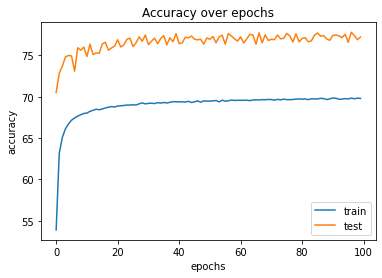

In [33]:
plt.plot(np.array(history['accuracy']) * 100)
plt.plot(np.array(history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.title('Accuracy over epochs')
plt.show()

Confusion matrix

In [34]:
# defining classes for labelling confusion matrix
Classes10 = ['bear', 'bee', 'bird', 'butterfly', 'camel', 'cat', 'cow', 'crab', 'crocodile', 'dog']

Classes20 = ['bear', 'bee', 'bird', 'butterfly', 'camel', 'cat', 'cow', 'crab', 'crocodile', 'dog', 
             'dolphin', 'elephant', 'frog', 'giraffe', 'horse', 'kangaroo', 'lion', 'lobster', 'monkey', 'mosquito']

Classes40 = ['bear', 'bee', 'bird', 'butterfly', 'camel', 'cat', 'cow', 'crab', 'crocodile', 'dog', 
             'dolphin', 'elephant', 'frog', 'giraffe', 'horse', 'kangaroo', 'lion', 'lobster', 'monkey', 'mosquito', 
             'mouse', 'octopus', 'owl', 'panda', 'parrot', 'penguin', 'pig', 'rabbit', 'raccoon', 'rhinoceros', 
             'scorpion', 'sea turtle', 'sheep', 'snail', 'snake', 'spider', 'squirrel', 'swan', 'tiger', 'whale']

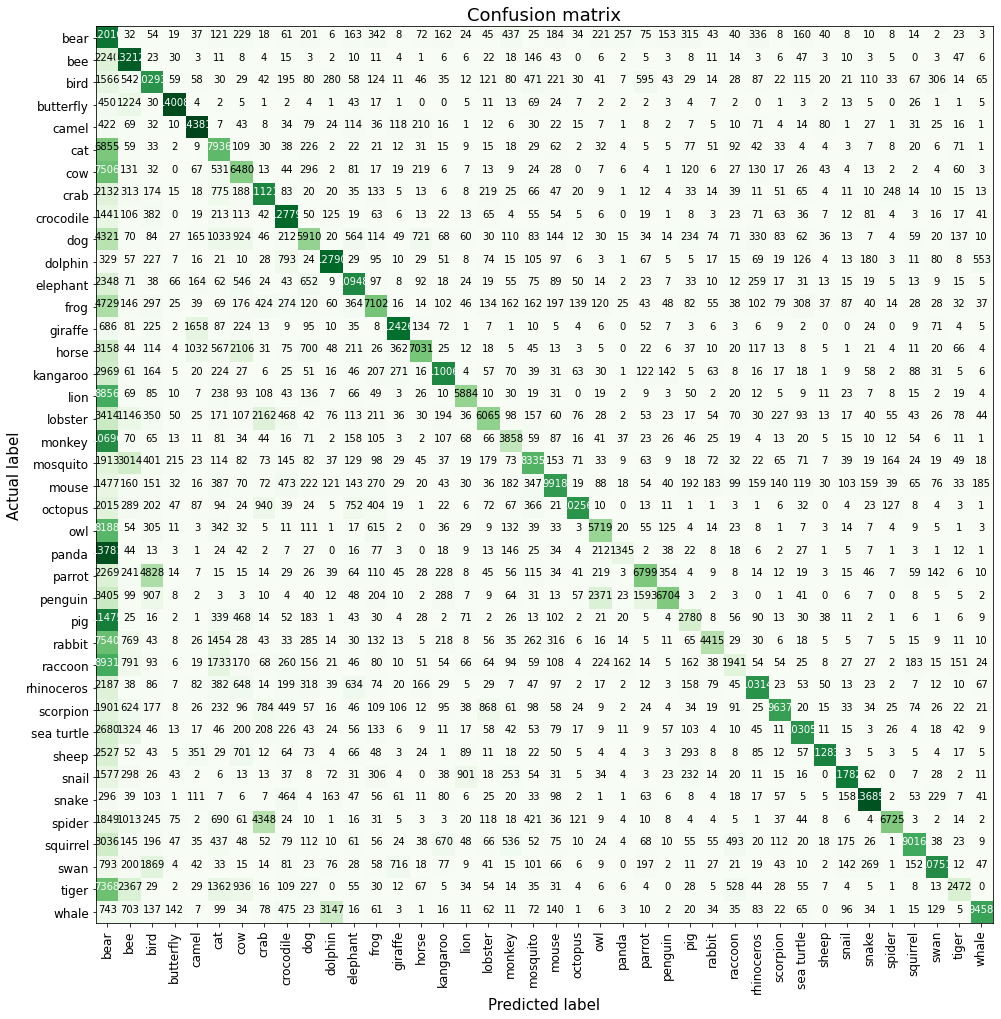

In [36]:
# one hot encoding of y
y_train40a_cat = tf.keras.utils.to_categorical(y_train40a)

# Predict the values from the test data
y_pred = saved_model2.predict(X_train40a)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_train40a_cat, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, Classes40)

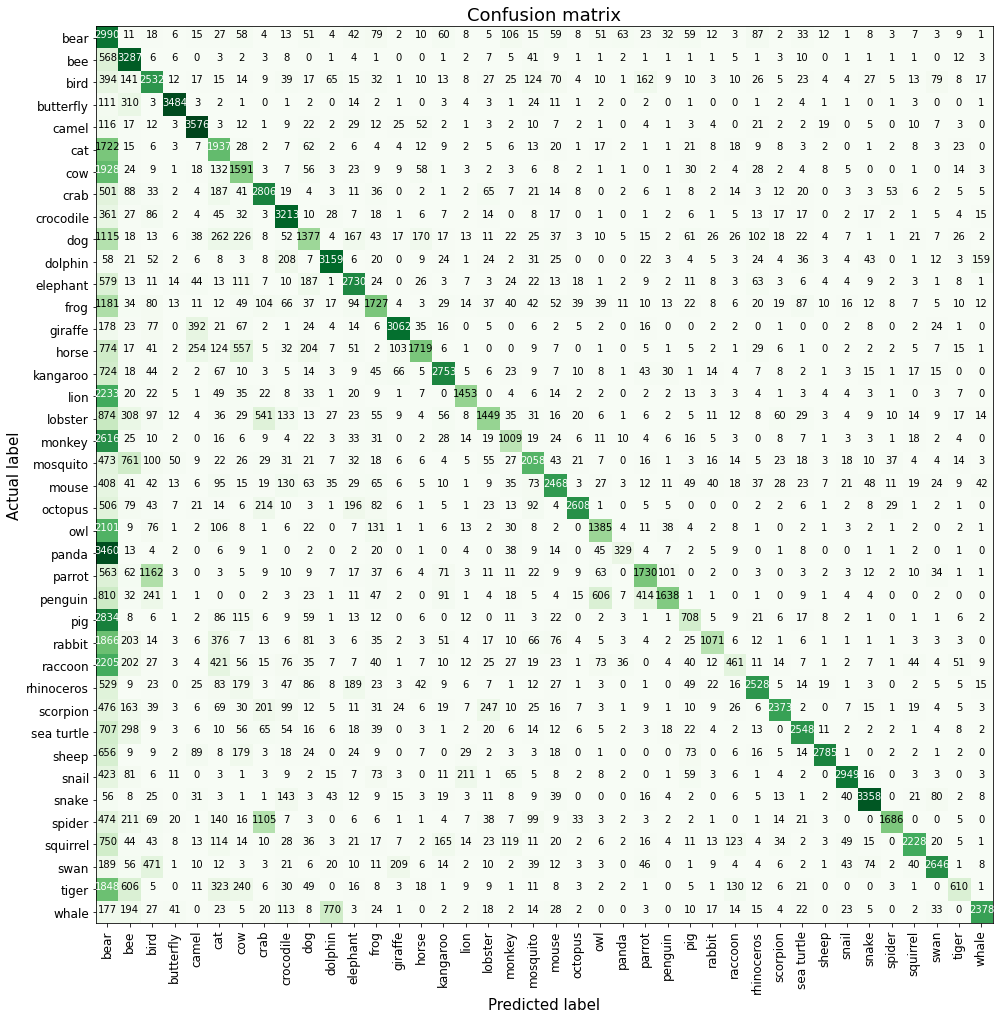

In [37]:
# one hot encoding of y
y_test40a_cat = tf.keras.utils.to_categorical(y_test40a)

# Predict the values from the test data
y_pred = saved_model2.predict(X_test40a)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test40a_cat, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, Classes40)

Classification report

In [162]:
print(classification_report(trueY, y_pred_Classes, target_names=Classes))


              precision    recall  f1-score   support

        bear       0.17      0.58      0.27      4000
         bee       0.68      0.71      0.69      4000
        bird       0.54      0.66      0.59      4000
   butterfly       0.80      0.28      0.42      4000
       camel       0.71      0.57      0.63      4000
         cat       0.69      0.54      0.61      4000
         cow       0.69      0.51      0.58      4000
        crab       0.75      0.77      0.76      4000
   crocodile       0.79      0.84      0.82      4000
         dog       0.56      0.47      0.51      4000
     dolphin       0.79      0.68      0.73      4000
    elephant       0.73      0.77      0.75      4000
        frog       0.71      0.56      0.63      4000
     giraffe       0.87      0.55      0.67      4000
       horse       0.77      0.74      0.75      4000
    kangaroo       0.77      0.65      0.71      4000
        lion       0.74      0.34      0.47      4000
     lobster       0.68    

### Model prediction

Visualizing a sample image 

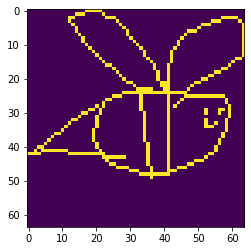

In [172]:
plt.imshow(X_test40a[5010])

Model prediction on this image

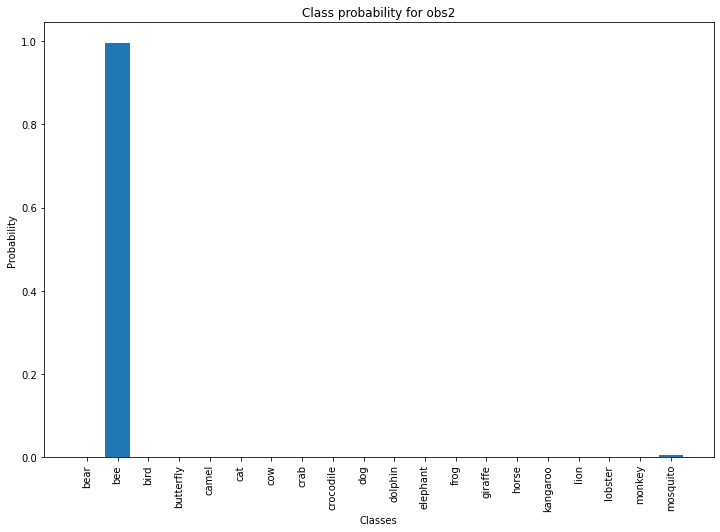

In [174]:
class_prob = saved_model.predict(X_test40a[5010:5011]).round(3)

plt.figure(figsize=(12, 8))
plt.title('Class probability for obs 5010')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.xticks(rotation='vertical')

#ax = plt.bar(Classes, height = class_prob)
ax = plt.bar(Classes, height = class_prob.reshape(20))
